# Goal is to compare performances of EW basket with Optimized basket

In [1]:
from class_basket import StockPortfolio, StockDataFetcher
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import os
import pandas as pd

name_bt="Backtest"
N = 3  # Number of assets
VT = 0.2  # Volatility target (example)
start_date = '2023-11-15'
end_date = '2025-01-16'

# COV_mat = np.zeros((N, N, data.shape[0]), dtype=float)  # covariance matrix
portfolio = StockPortfolio(N, start_date, end_date, VT)
BT, tickers = portfolio.run_optimization()
BT.index=pd.to_datetime(BT.index)
BT

ERROR:yfinance:$RBOT-WT: possibly delisted; no price data found  (1d 2023-11-15 -> 2025-01-16)


Current valid tickers: {'LLOBF', 'BCHG'}
Current valid tickers: {'LLOBF', 'DIAX', 'BCHG'}


,Index Level
Date,
2024-03-19,100.000000
2024-03-20,102.433972
2024-03-21,102.920856
2024-03-22,102.866902
2024-03-25,104.049310
...,...
2025-01-08,145.489223
2025-01-10,144.057762
2025-01-13,142.124587


In [10]:
from class_basket import Equally_weighted, StockDataFetcher
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import os

df_equally_weighted, _ = Equally_weighted(N, start_date, end_date,tickers=None).compute_equally_weighted_basket()
df_equally_weighted.index=pd.to_datetime(df_equally_weighted.index.strftime('%Y-%m-%d'))
print("Equally Weighted Basket:\n", df_equally_weighted.head())


ERROR:yfinance:$MOBXW: possibly delisted; no price data found  (1d 2023-11-15 -> 2025-01-16)
ERROR:yfinance:$RDW-WT: possibly delisted; no price data found  (1d 2023-11-15 -> 2025-01-16)


Current valid tickers: {'ENSV'}
Current valid tickers: {'UNG', 'LNZA', 'ENSV'}
Equally Weighted Basket:
             Equally Weighted
Date                        
2023-11-15        100.000000
2023-11-16         99.119918
2023-11-17         97.904374
2023-11-20         97.374731
2023-11-21         98.193400


In [ ]:
BT.index

In [11]:
df=pd.concat([BT,df_equally_weighted], axis=1)

In [14]:
df.tail()

,Index Level,Equally Weighted
Date,,
2025-01-08,145.489223,48.061086
2025-01-10,144.057762,46.275905
2025-01-13,142.124587,43.304072
2025-01-14,141.528505,43.049764
2025-01-15,142.690116,43.623086


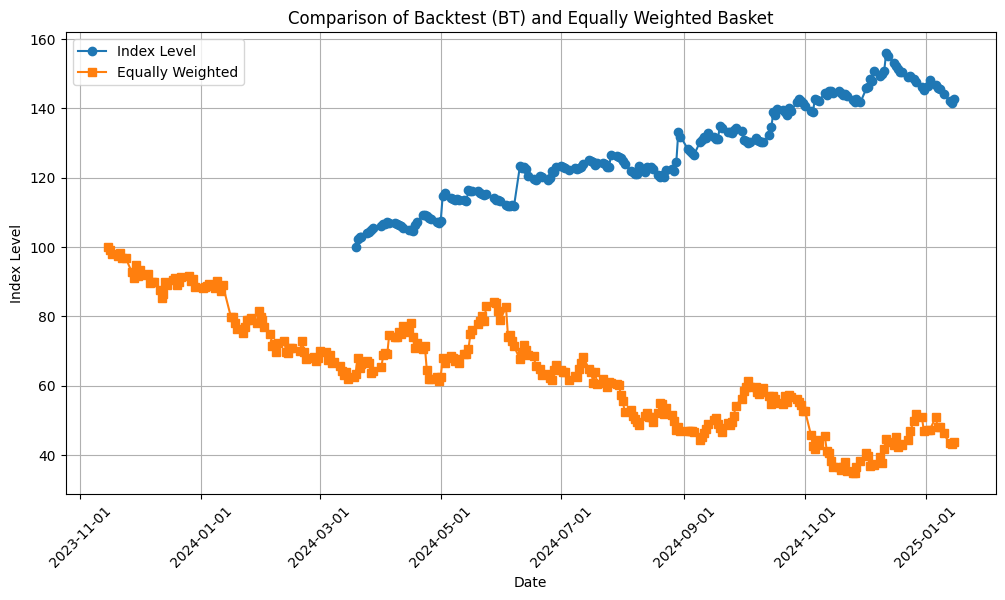

In [13]:

# Ensure the index is a DatetimeIndex
df.index = pd.to_datetime(df.index)

# Create the plot
plt.figure(figsize=(12, 6))

plt.plot(df.index, df.iloc[:, 0], label=df.columns[0], linestyle='-', marker='o')  # First column (BT)
plt.plot(df.index, df.iloc[:, 1], label=df.columns[1], linestyle='-', marker='s')  # Second column (Equally Weighted)

# Formatting
plt.xlabel("Date")
plt.ylabel("Index Level")
plt.title("Comparison of Backtest (BT) and Equally Weighted Basket")
plt.legend()
plt.grid(True)

# Improve x-axis readability
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [30]:
from stats import Stats

print("Optimized Basket Stats:", Stats(BT.dropna()).summary())
df_equally_weighted_temp=df_equally_weighted.copy()
df_equally_weighted_temp.columns=['Index Level']
print("Equally Weighted Basket Stats:", Stats(df_equally_weighted_temp).summary())

Optimized Basket Stats:                           Value
Annualized Return      0.345340
Annualized Volatility  0.216322
Sharpe Ratio           1.503962
Max Drawdown          -0.092201
Equally Weighted Basket Stats:                           Value
Annualized Return     -0.387123
Annualized Volatility  0.549143
Sharpe Ratio          -0.741378
Max Drawdown          -0.652556
